In [1]:
#Auther@Masayuki Ishimariu

Reference: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import warnings
import random

%matplotlib inline

In [3]:
warnings.filterwarnings('ignore')

# Load data

In [4]:
df = pd.read_csv('glass.csv')
print(df.shape)
df.head()

(214, 11)


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
# Use composition data only

df = df.iloc[:, 2:10]
print(df.shape)
df.head()

(214, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [6]:
# Get column numbers of start and end with regard to compositions

start = df.columns.get_loc('Na')
end   = df.columns.get_loc('Fe') + 1
print(start, end)

0 8


# Check distributions of compositions

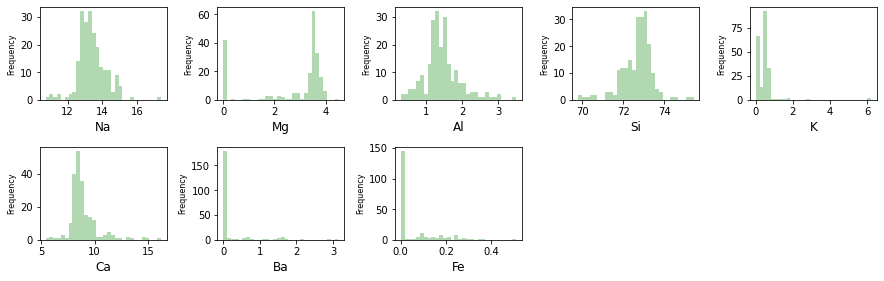

In [7]:
# Draw distributions of compositions

horz = 5
vert = 5
graph_num = horz * vert

ax = []
fig = plt.figure(figsize=(15, 12))

for i in range(1, len(df.columns) + 1):
    ax.append(fig.add_subplot(vert, horz, i))
    comp_val = df.iloc[:, i - 1]
    ax[i-1].hist(comp_val, color = 'g', alpha = 0.3, bins = 30)
        
    ax[i-1].set_xlabel(df.columns.values[i - 1], size = 12)
    ax[i-1].set_ylabel('Frequency', size = 8)

plt.subplots_adjust(wspace = 0.4, hspace = 0.5)
plt.show()

# Fir distributions by given bandwidth

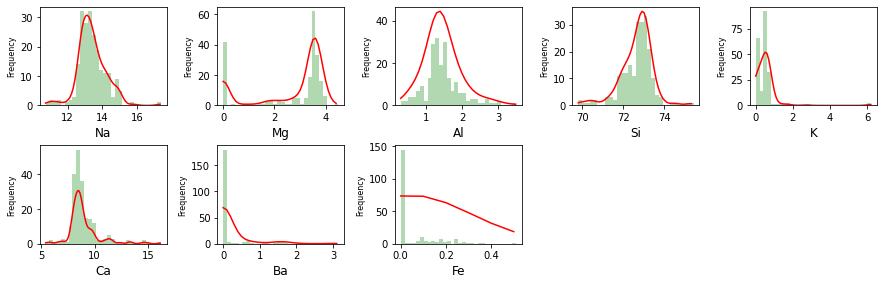

In [8]:
# Draw distribution fitting curves

horz = 5
vert = 5
graph_num = horz * vert

best_dist_name = []

ax = []
fig = plt.figure(figsize=(15, 12))

for i in range(1, len(df.columns) + 1):
    ax.append(fig.add_subplot(vert, horz, i))
    
    data = df.iloc[:, i - 1]
    x_range = np.arange(data.min(), data.max(), 0.1)
    
    kde = KernelDensity(bandwidth = 0.25, kernel = 'gaussian')             # bandwidth changes smoothness
    #kde = KernelDensity(bandwidth = 1.0, kernel = 'cosine')
    #kde = KernelDensity(bandwidth = 1.0, kernel = 'epanechnikov')
    #kde = KernelDensity(bandwidth = 1.0, kernel = 'tophat')
    #kde = KernelDensity(bandwidth = 1.0, kernel = 'exponential')
    #kde = KernelDensity(bandwidth = 1.0, kernel = 'linear')
    
    kde.fit(data[:, None])
    density = np.exp(kde.score_samples(x_range[:, None]))

    ax[i-1].hist(data, color = 'g', alpha = 0.3, bins = 30)
    ax[i-1].plot(x_range, density * 50, c = 'r')                 # change 50 according to the original data
        
    ax[i-1].set_xlabel(df.columns.values[i - 1], size = 12)
    ax[i-1].set_ylabel('Frequency', size = 8)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.show()

# Generate random sample function

In [9]:
# Input sample size

data_num  = 10000

In [10]:
def dist_fit_sampling(data):
    
    comp_step = (data.max() - data.min())/100.0      # use 1/100 of composition range as sampling step of x
    comp_val  = []
    acc_num   = 0
    
    x_range = np.arange(data.min(), data.max(), comp_step)
    
    kde = KernelDensity(bandwidth = 0.25, kernel = 'gaussian')             # bandwidth changes smoothness
    #kde = KernelDensity(bandwidth = 1.0, kernel = 'cosine')
    #kde = KernelDensity(bandwidth = 1.0, kernel = 'epanechnikov')
    #kde = KernelDensity(bandwidth = 1.0, kernel = 'tophat')
    #kde = KernelDensity(bandwidth = 1.0, kernel = 'exponential')
    #kde = KernelDensity(bandwidth = 1.0, kernel = 'linear')
    
    kde.fit(data[:, None])
    density = np.exp(kde.score_samples(x_range[:, None]))

    # get total number of generating samples
    for i in range(100):
        pdf = density[i] * 1000              # 1000 is large enough number than density
        acc_num = acc_num + pdf

    acc_max = int(acc_num)

    # real sample generation
    for j in range(100):
        pdf = density[j] * 1000              # 1000 is large enough number than density
        pdf_int = int(round(data_num * (pdf / acc_max)))        # adjust to the desired sample size
        
        for k in range(pdf_int):
            comp_val.append(x_range[j])

    return random.sample(comp_val, len(comp_val))         # shuffle data and finish

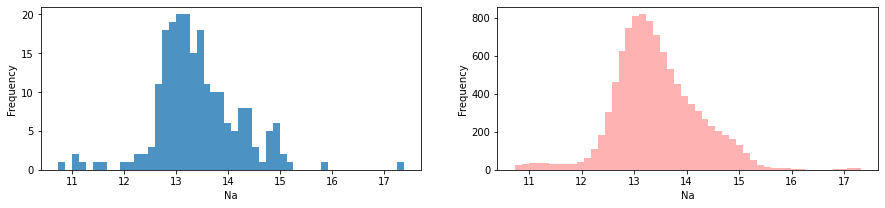

In [11]:
# Check original distribution and generated data distribution

comp_select = 'Na'

fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

comp_val = dist_fit_sampling(df[comp_select])
ax1.hist(df[comp_select], bins = 50, alpha = 0.8)
ax1.set_xlabel(comp_select)
ax1.set_ylabel('Frequency')

ax2.hist(comp_val, bins = 50, alpha = 0.3, color = 'r')
ax2.set_xlabel(comp_select)
ax2.set_ylabel('Frequency')

plt.show()

# Generate random samples

In [12]:
# Generate random samples following distribution of each composition and save them to temp_data folder as Pandas DataFrame

min_len = 100000        # much larger number than data_num　 =>　use to make data tables later
max_len = 0             # much smaller number than data_num　=>　ditto

for i in range(end - start):
    data = df.iloc[:, i]

    comp_val = dist_fit_sampling(data)
    
    if len(comp_val) < min_len:
        min_len = len(comp_val)
    if len(comp_val) > max_len:
        max_len = len(comp_val)
    
    comp_save = pd.Series(comp_val)
    comp_save.to_csv('temp_data/comp_sampling_' + str(df.columns.values[i]) + '.csv', index = None) 

In [13]:
print(min_len, max_len)

9995 10003


In [14]:
# Make Numpy matrix with mini_len rows and composition columns, allocate sampling data, and convert to Pandas DataFrame

random_sampling = np.zeros((end - start) * min_len).reshape(min_len, (end - start))
df_random_sampling = pd.DataFrame(random_sampling)
df_random_sampling.columns = df.columns.values[start:end]

for i in range(end - start):
    column_name = df.columns.values[i]
    df_random_sampling[column_name] = pd.read_csv('temp_data/comp_sampling_' + str(column_name) + '.csv')
    
print(df_random_sampling.shape)
df_random_sampling.head()

(9995, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,12.7250,3.9512,1.2851,73.338,0.2484,8.9808,0.0945,0.0000
1,13.1240,0.2694,1.2209,73.394,0.3105,8.8732,0.0315,0.0510
2,13.6560,0.0449,1.9271,73.282,0.4968,7.1516,1.6065,0.0204
3,12.6585,0.2694,0.9641,72.778,0.5589,8.3352,0.2835,0.0255
4,13.0575,3.2328,1.8950,73.114,0.0000,8.6580,0.7560,0.0561


In [15]:
# Adjust to the total element = 100%

df_dist_rand = df_random_sampling.apply(lambda x: 100 * x/np.sum(x), axis=1)
print(df_dist_rand.shape)
df_dist_rand.head()

(9995, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,12.646214,3.926736,1.277143,72.883933,0.246862,8.925196,0.093915,0.000000
1,13.491717,0.276948,1.255108,75.450401,0.319200,9.121815,0.032383,0.052429
2,13.908396,0.045730,1.962717,74.636427,0.505982,7.283779,1.636192,0.020777
3,13.203391,0.280996,1.005600,75.910761,0.582958,8.693992,0.295703,0.026598
4,12.957803,3.208117,1.880531,72.555756,0.000000,8.591894,0.750228,0.055672


In [16]:
# Sanity check

test = np.sum(df_dist_rand, axis=1)
print(test[0:2])
print(test[998:1000])

0    100.0
1    100.0
dtype: float64
998    100.0
999    100.0
dtype: float64


Samples generated for reverse analysis


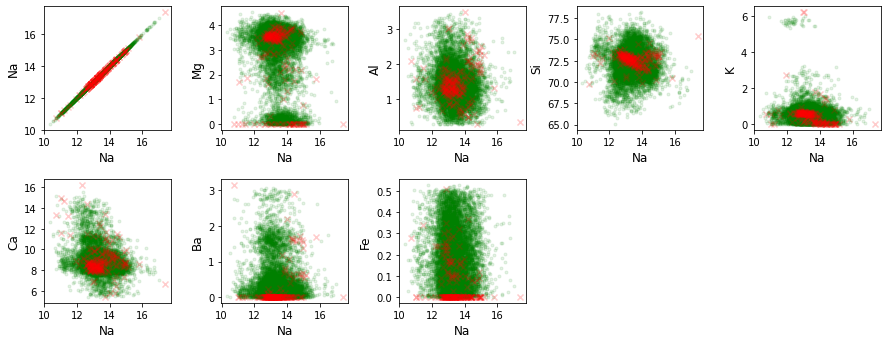

In [17]:
# Draw scatter plots of samples generated with the original data

horz = 5
vert = 5
graph_num = horz * vert
ax = list()

print('Samples generated for reverse analysis')
fig = plt.figure(figsize=(15, 15))

for i in range(start, end):
    ax.append(fig.add_subplot(vert, horz, i+1))

    x_sample = df_dist_rand.iloc[:, start]
    y_sample = df_dist_rand.iloc[:, i]
    x_train  = df.iloc[:, start]
    y_train  = df.iloc[:, i]
    ax[i].scatter(x_sample, y_sample, c='g', marker = '.', alpha = 0.1)
    ax[i].scatter(x_train, y_train, c='red', marker = 'x', alpha = 0.2)
    ax[i].set_xlabel(df_dist_rand.columns[start], size = 12)
    ax[i].set_ylabel(df_dist_rand.columns[i], size = 12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [18]:
# Save the data genetrated

df_dist_rand.to_csv('generated_samples_fit_dist.csv', index = None)